### step 1

In [17]:
import sqlite3
connection = sqlite3.connect('student_grades.db')

In [18]:
cursor = connection.cursor()

### step 2


In [19]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL
    )
''')


cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT NOT NULL,
        grade INTEGER,
        FOREIGN KEY(student_id) REFERENCES students(student_id)
    )
''')

### step 3
Insert at least 5 students into the students table and at least 3 grades for each student into
the grades table.

In [20]:
students_data = [
    ('Emily', 'Zhou'),
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

In [21]:
grades_data = [
    (1, 'Math', 80),
    (1, 'English', 90),
    (1, 'Science', 65),
    (2, 'Math', 80),
    (2, 'Science', 85),
    (2, 'History', 98),
    (3, 'Math', 99),
    (3, 'Science', 85),
    (3, 'English', 100),
    (4, 'Science', 83),
    (4, 'Math', 77),
    (4, 'English', 33),
    (5, 'English', 61),
    (5, 'Math', 0),
    (5, 'History', 44),

]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

### step 4

1. Retrieve all students' names and their grades.

In [22]:
cursor.execute("SELECT * FROM students")
rows = cursor.fetchall()

print("All students data:")
for row in rows:
    print(row)

print('\n')

cursor.execute("SELECT * FROM grades")
rows = cursor.fetchall()

print("All grades data:")
for row in rows:
    print(row)

All students data:
(1, 'Emily', 'Zhou')
(2, 'Alice', 'Johnson')
(3, 'Bob', 'Smith')
(4, 'Carol', 'White')
(5, 'Eve', 'Davis')
(6, 'Emily', 'Zhou')
(7, 'Alice', 'Johnson')
(8, 'Bob', 'Smith')
(9, 'Carol', 'White')
(10, 'Eve', 'Davis')


All grades data:
(1, 1, 'Math', 80)
(2, 1, 'English', 90)
(3, 1, 'Science', 65)
(4, 2, 'Math', 80)
(5, 2, 'Science', 85)
(6, 2, 'History', 98)
(7, 3, 'Math', 99)
(8, 3, 'Science', 85)
(9, 3, 'English', 100)
(10, 4, 'Science', 83)
(11, 4, 'Math', 77)
(12, 4, 'English', 33)
(13, 5, 'English', 61)
(14, 5, 'Math', 0)
(15, 5, 'History', 44)
(16, 1, 'Math', 80)
(17, 1, 'English', 90)
(18, 1, 'Science', 65)
(19, 2, 'Math', 80)
(20, 2, 'Science', 85)
(21, 2, 'History', 98)
(22, 3, 'Math', 99)
(23, 3, 'Science', 85)
(24, 3, 'English', 100)
(25, 4, 'Science', 83)
(26, 4, 'Math', 77)
(27, 4, 'English', 33)
(28, 5, 'English', 61)
(29, 5, 'Math', 0)
(30, 5, 'History', 44)


2. Find the average grade for each student.

In [23]:
cursor.execute('''
  SELECT s.student_id, s.first_name, s.last_name, AVG(grade) AS average_grade
  FROM grades g
  JOIN students s ON g.student_id = s.student_id
  GROUP BY s.student_id
''')
rows = cursor.fetchall()
print("Average grade for individual students:")
for row in rows:
  student_id, first_name, last_name, average_grade = row
  print(f"student id: {student_id}, name: {first_name} {last_name}, avg grade: {average_grade:.2f}")

Average grade for individual students:
student id: 1, name: Emily Zhou, avg grade: 78.33
student id: 2, name: Alice Johnson, avg grade: 87.67
student id: 3, name: Bob Smith, avg grade: 94.67
student id: 4, name: Carol White, avg grade: 64.33
student id: 5, name: Eve Davis, avg grade: 35.00


3. Find the student with the highest average grade.

In [24]:
cursor.execute('''
  SELECT s.student_id, s.first_name, s.last_name, AVG(grade) AS average_grade
  FROM grades g
  JOIN students s ON g.student_id = s.student_id
  GROUP BY s.student_id
  ORDER BY average_grade DESC
  LIMIT 1
''')
rows = cursor.fetchall()
print("Student with highest average grade")
for row in rows:
  student_id, first_name, last_name, average_grade = row
  print(f"student id: {student_id}, name: {first_name} {last_name}, avg grade: {average_grade:.2f}")

Student with highest average grade
student id: 3, name: Bob Smith, avg grade: 94.67


4. Find the average grade for the Math subject

In [25]:
cursor.execute('''
  SELECT AVG(grade) AS average_grade
  FROM grades g
  WHERE subject = 'Math'
''')
rows = cursor.fetchall()
# print("Average grade for math")
for row in rows:
  average_grade = row[0]
  print(f"avg grade for math: {average_grade:.2f}")

avg grade for math: 67.20


5. List all students who scored above 90 in any subject

In [26]:
cursor.execute('''
  SELECT s.student_id, s.first_name, s.last_name
  FROM grades g
  JOIN students s ON g.student_id = s.student_id
  WHERE g.grade > 90
''')
rows = cursor.fetchall()
print("Students who scored above 90 in any subj")
for row in rows:
  student_id, first_name, last_name = row
  print(f"student id: {student_id}, name: {first_name} {last_name}")

Students who scored above 90 in any subj
student id: 2, name: Alice Johnson
student id: 3, name: Bob Smith
student id: 3, name: Bob Smith
student id: 2, name: Alice Johnson
student id: 3, name: Bob Smith
student id: 3, name: Bob Smith


### Step 5

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

stud_df = pd.read_sql_query('SELECT * FROM students', connection)
display(stud_df)

,student_id,first_name,last_name
0,1,Emily,Zhou
1,2,Alice,Johnson
2,3,Bob,Smith
3,4,Carol,White
4,5,Eve,Davis
5,6,Emily,Zhou
6,7,Alice,Johnson
7,8,Bob,Smith
8,9,Carol,White
9,10,Eve,Davis


In [28]:
grade_df = pd.read_sql_query('SELECT * FROM grades', connection)
display(grade_df)

,grade_id,student_id,subject,grade
0,1,1,Math,80
1,2,1,English,90
2,3,1,Science,65
3,4,2,Math,80
4,5,2,Science,85
5,6,2,History,98
6,7,3,Math,99
7,8,3,Science,85
8,9,3,English,100
9,10,4,Science,83


In [29]:
query = '''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM grades g
    JOIN students s ON g.student_id = s.student_id
'''
df = pd.read_sql_query(query, connection)
display(df)

,first_name,last_name,subject,grade
0,Emily,Zhou,Math,80
1,Emily,Zhou,English,90
2,Emily,Zhou,Science,65
3,Alice,Johnson,Math,80
4,Alice,Johnson,Science,85
5,Alice,Johnson,History,98
6,Bob,Smith,Math,99
7,Bob,Smith,Science,85
8,Bob,Smith,English,100
9,Carol,White,Science,83


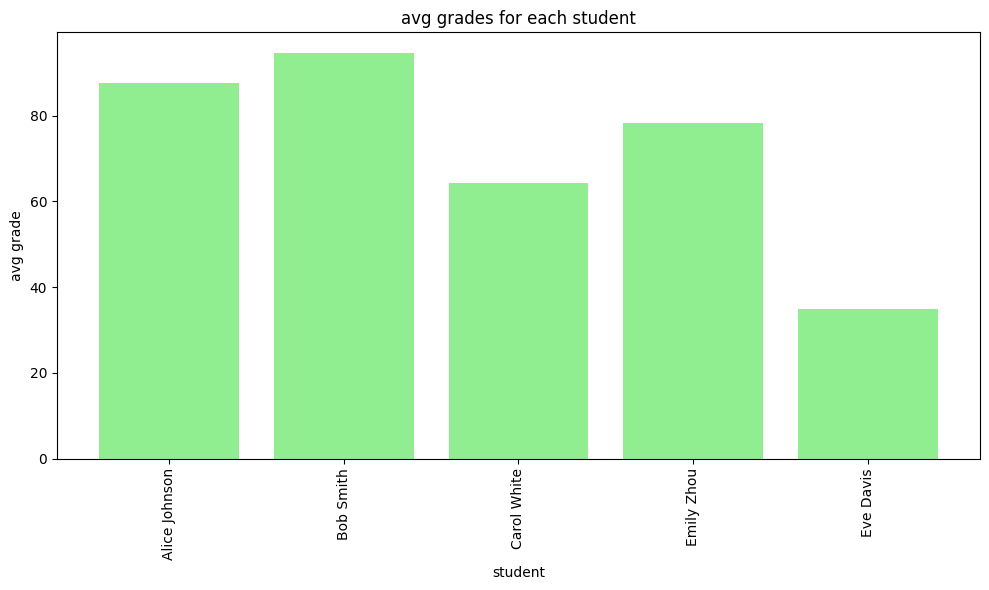

In [30]:
#avg grade by student
average_grades = df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
average_grades.columns = ['first', 'last', 'avg grade']

plt.figure(figsize=(10, 6))
plt.bar(average_grades['first'] + ' ' + average_grades['last'], average_grades['avg grade'], color='lightgreen')
plt.xlabel('student')
plt.ylabel('avg grade')
plt.title('avg grades for each student')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### bonus task

  first_name last_name  subject  grade
0      Alice   Johnson  Science     85
1      Alice   Johnson  History     98
2        Bob     Smith     Math     99
3        Bob     Smith  Science     85
4        Bob     Smith  English    100
5      Alice   Johnson  Science     85
6      Alice   Johnson  History     98
7        Bob     Smith     Math     99
8        Bob     Smith  Science     85
9        Bob     Smith  English    100


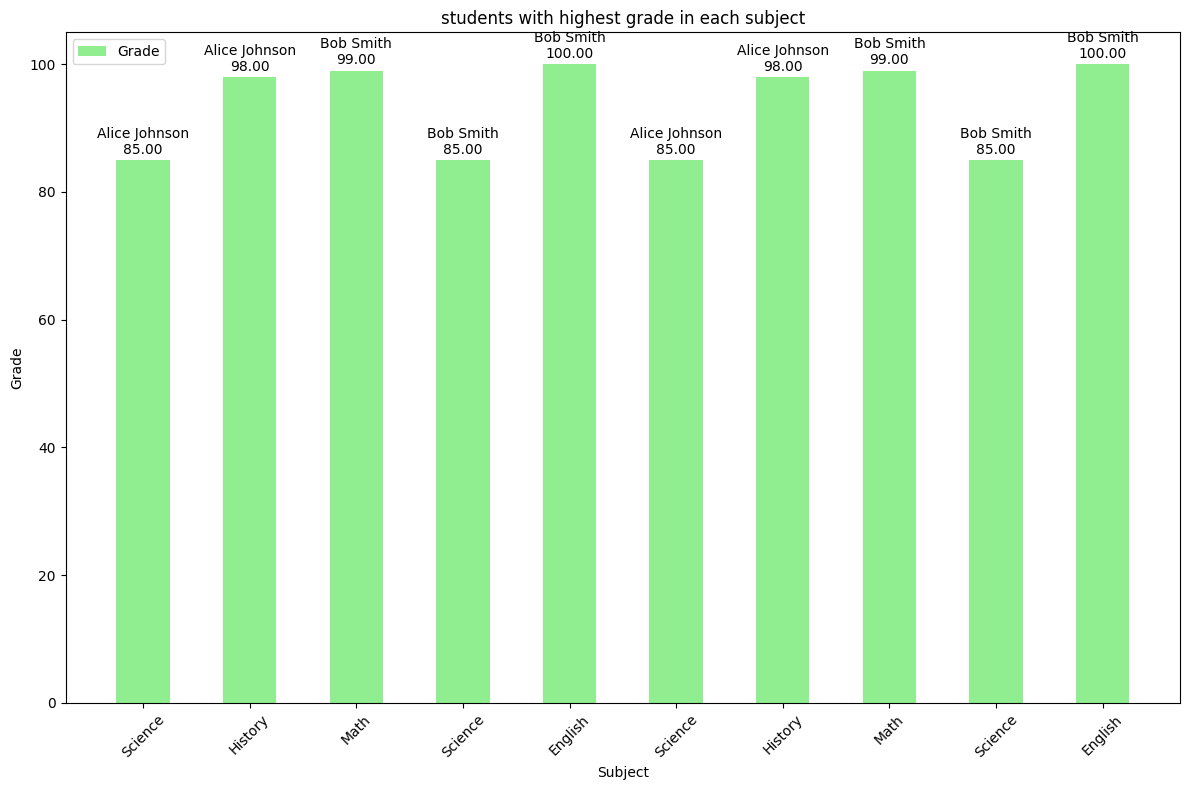

In [31]:
query = '''
    WITH MaxGrades AS (
        SELECT subject, MAX(grade) AS max_grade
        FROM grades
        GROUP BY subject
    )
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM grades g
    JOIN students s ON g.student_id = s.student_id
    JOIN MaxGrades mg ON g.subject = mg.subject AND g.grade = mg.max_grade
'''
# maxgrades -> highest grades for each subject
# join maxgrades -> only records with max grades for each subject r included

maxgrades = pd.read_sql_query(query, connection)

print(maxgrades)

plt.figure(figsize=(12, 8))
subjects = maxgrades['subject']
students = maxgrades['first_name'] + ' ' + maxgrades['last_name']
grades = maxgrades['grade']

index = range(len(subjects))

plt.bar(index, grades, width=0.5, label='Grade', color='lightgreen')

for i, (student, grade) in enumerate(zip(students, grades)):
    plt.text(i, grade + 0.5, f'{student}\n{grade:.2f}', ha='center', va='bottom')

plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('students with highest grade in each subject')
plt.xticks(index, subjects, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
connection.close()